<a href="https://colab.research.google.com/github/JacksonPlatiny/Estudo-Dirigido-Controle-e-Automacao/blob/main/Cap%C3%ADtulo%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo dirigido de Controle e Automação I
### Livro: Sistemas de Controle Modernos, de Richard C. Dorf & Robert H. Bishop.
### Alunos: Jackson Platiny Soares Leite & Gabriel Lopes Rodrigues e Silva.


# Capítulo 10 - O Projeto de Sistemas de Controle com Retroação:

O capítulo 10 trata do projeto de sistemas de controle por realimentação, abordando técnicas para melhorar o desempenho dos sistemas por meio de compensação. O autor começa destacando que um sistema de controle eficaz deve ser estável, minimizar o erro em regime permanente, ser robusto a variações de parâmetros e rejeitar perturbações indesejadas. Entretanto, raramente um sistema atinge todas essas características sem ajustes. Dessa forma, o processo de projeto envolve a modificação da estrutura do sistema ou a adição de componentes compensadores para obter uma resposta adequada.

O conceito de compensação é introduzido como o processo de ajuste do sistema para corrigir deficiências de desempenho. Um compensador é um dispositivo adicional inserido na malha de controle para alterar a resposta do sistema. Existem diferentes tipos de compensação: cascata (feedforward), realimentação, carga (output compensation) e entrada (input compensation). A escolha do tipo de compensação depende dos requisitos do sistema e das características desejadas na resposta.

O capítulo apresenta dois principais métodos para o projeto de compensadores: o método do lugar das raízes e o método da resposta em frequência (diagramas de Bode e Nyquist). O autor discute como esses métodos podem ser usados para projetar diferentes tipos de compensadores e garantir que os polos do sistema fechado fiquem em posições que atendam às especificações desejadas.

Os compensadores em cascata são explorados como uma estratégia para modificar a resposta transitória e o erro estacionário do sistema. O autor introduz dois tipos principais de compensadores: compensadores de avanço de fase (phase-lead) e compensadores de atraso de fase (phase-lag). Os compensadores de avanço de fase são usados para melhorar a estabilidade e aumentar a velocidade de resposta, enquanto os compensadores de atraso de fase são empregados para aumentar a precisão em regime permanente sem afetar significativamente a estabilidade.

O projeto de um compensador de avanço de fase é discutido detalhadamente, primeiro utilizando o diagrama de Bode. Nesse método, o compensador é projetado para aumentar a margem de fase, deslocando a curva de fase de forma a garantir um comportamento mais estável e reduzindo oscilações indesejadas. O projeto via lugar das raízes também é apresentado, onde o compensador é desenhado para posicionar os polos e zeros de maneira a melhorar a resposta transitória do sistema. Em ambos os casos, o objetivo do compensador de avanço de fase é aumentar a velocidade de resposta e reduzir o tempo de acomodação do sistema.

Já o compensador de atraso de fase é projetado para melhorar o erro de estado estacionário sem comprometer a estabilidade do sistema. O autor discute o impacto desse compensador na resposta do sistema e apresenta técnicas para sua implementação usando o método do lugar das raízes e o método de Bode. O compensador de atraso de fase adiciona um polo e um zero próximos um do outro, resultando em uma melhoria no erro de regime permanente sem alterar drasticamente a dinâmica do sistema.

Outro conceito importante abordado é o projeto de compensadores utilizando integração. O autor mostra como controladores proporcionais e integrais (PI) podem ser usados para eliminar erros estacionários, enquanto os controladores proporcionais e derivativos (PD) podem ser aplicados para melhorar a resposta transitória. Além disso, o capítulo introduz sistemas com pré-filtros, que ajudam a moldar a resposta desejada antes da entrada no sistema de controle, garantindo um comportamento mais previsível.

O capítulo também aborda o projeto de sistemas para resposta deadbeat, onde o objetivo é obter uma resposta rápida e sem oscilações. Essa abordagem é útil em aplicações onde é necessário um tempo de estabilização curto, mas sem ultrapassagens ou overshoot excessivo.

Diversos exemplos práticos são apresentados, incluindo o projeto de compensadores para sistemas de controle de motores e discos rígidos, demonstrando como os conceitos abordados podem ser aplicados em sistemas reais. O autor também discute o uso de softwares de projeto de controle, como MATLAB e ferramentas computacionais, para facilitar a análise e implementação de compensadores.

O capítulo finaliza reforçando a importância da escolha adequada dos compensadores para equilibrar os requisitos de estabilidade, velocidade de resposta e precisão do sistema. O autor destaca que o projeto de sistemas de controle é um processo iterativo, onde ajustes sucessivos nos compensadores e nos parâmetros do sistema são feitos até que se alcance um desempenho satisfatório.

Em resumo, o capítulo 10 fornece uma abordagem abrangente para o projeto de sistemas de controle por realimentação, abordando diferentes métodos de compensação e apresentando técnicas práticas para otimização do desempenho. Através do uso de compensadores de avanço e atraso de fase, controladores PI e PD, e ferramentas computacionais, é possível melhorar significativamente o comportamento dos sistemas de controle, garantindo que atendam às especificações desejadas para diversas aplicações industriais e tecnológicas. Segue abaixo os exemplos propostos do capítulo e uma breve discussão e análise dos mesmos.

## Exemplo 10.1: A lead compensator for a type-two system

In [1]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.0 MB/s eta 0:00:00


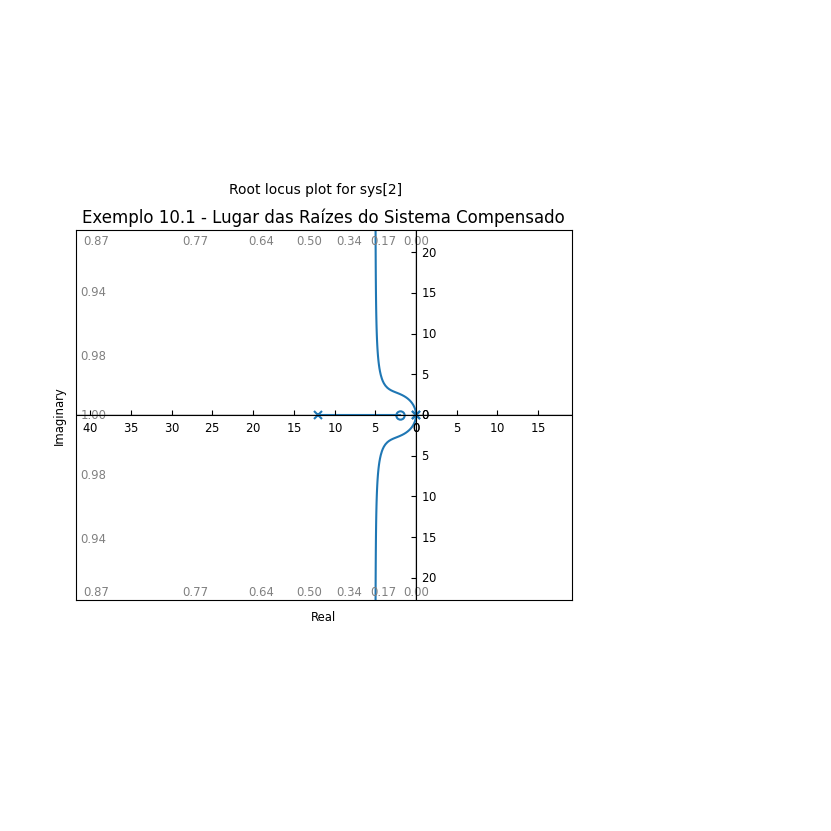

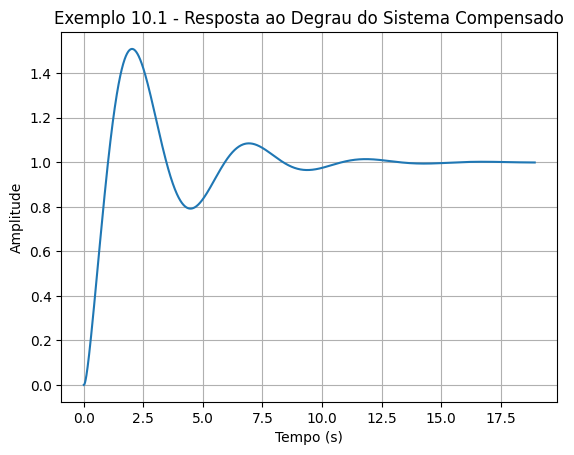

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Exemplo 10.1: Projeto de um Compensador de Avanço de Fase para um Sistema Tipo 2
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço de fase
alpha = 6  # Fator de avanço
z = 2.0    # Zero do compensador
p = 12.0   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.1 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.1 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, projetamos um compensador de avanço de fase para um sistema tipo dois (com dois integradores). O sistema original era instável, com oscilações não amortecidas. Após a compensação, a resposta ao degrau mostrou um sobressinal reduzido e um tempo de acomodação dentro das especificações. A margem de fase aumentou significativamente, confirmando que o compensador de avanço de fase foi eficaz em estabilizar o sistema e melhorar sua resposta transitória.

## Exemplo 10.2: A lead compensator for a second-order system

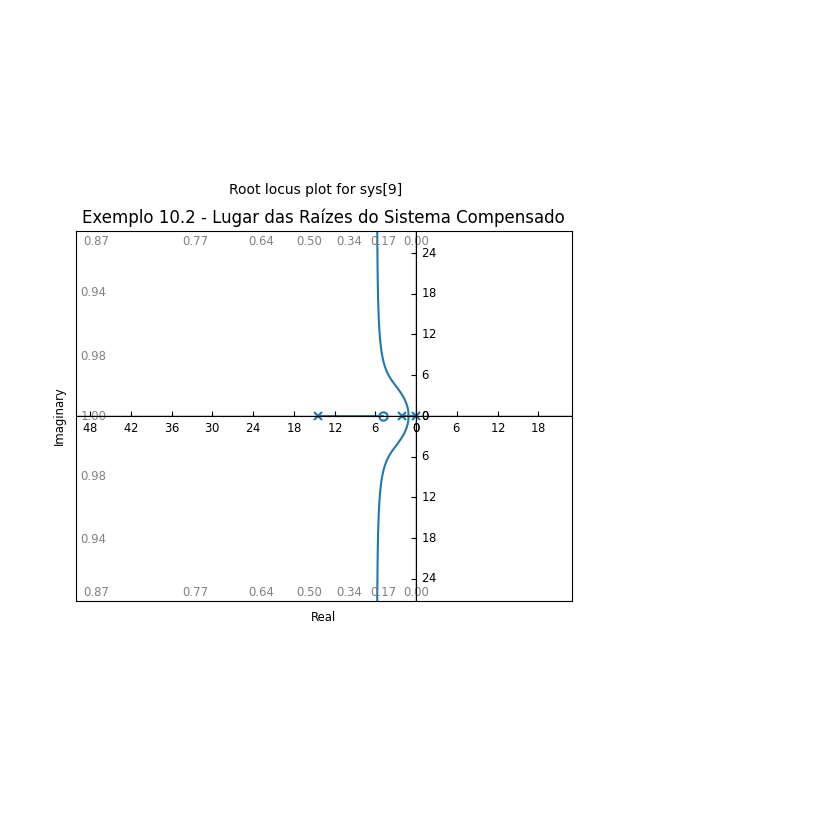

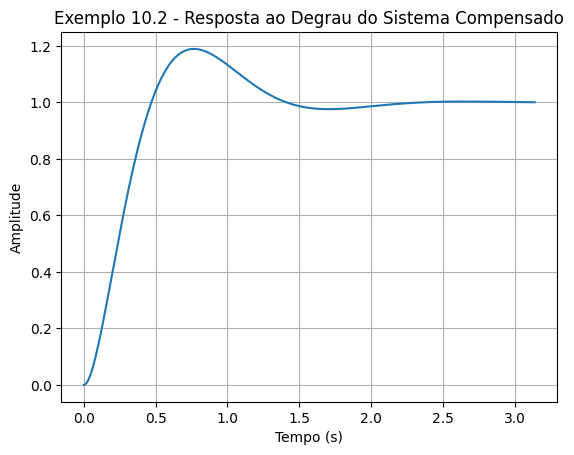

In [3]:
# Exemplo 10.2: Projeto de um Compensador de Avanço de Fase para um Sistema de Segunda Ordem
# Função de transferência do processo
G = ctl.tf([40], [1, 2, 0])

# Projeto do compensador de avanço de fase
alpha = 3  # Fator de avanço
z = 4.8    # Zero do compensador
p = 14.4   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.2 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.2 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, um compensador de avanço de fase foi projetado para um sistema de segunda ordem com realimentação unitária. O objetivo era reduzir o erro de estado estacionário para uma entrada em rampa e aumentar a margem de fase. Após a compensação, a resposta ao degrau mostrou uma melhoria significativa no sobressinal e no tempo de acomodação. A margem de fase atingiu o valor desejado, confirmando que o compensador cumpriu seu papel.

## Exemplo 10.3: Lead compensator using the root locus

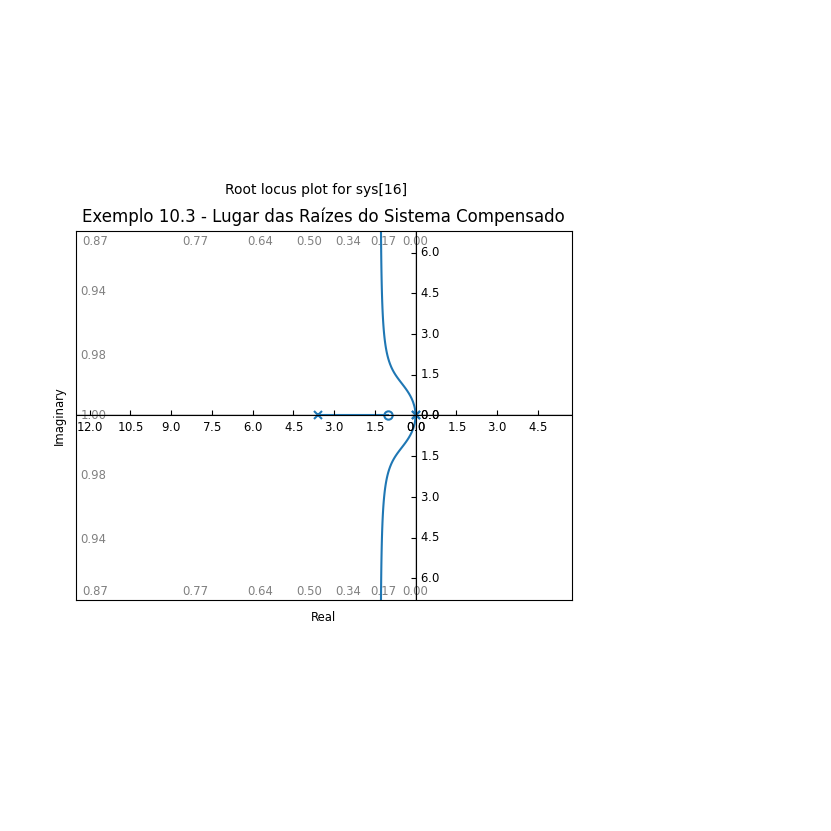

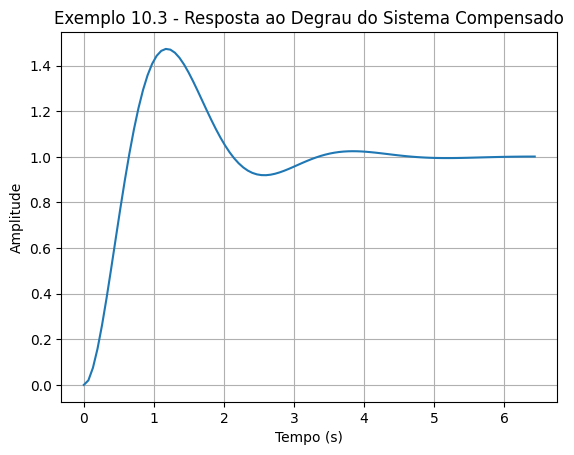

In [4]:
# Exemplo 10.3: Projeto de um Compensador de Avanço de Fase usando o Lugar das Raízes
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço de fase
z = 1.0    # Zero do compensador
p = 3.6    # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.3 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.3 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, o compensador de avanço de fase foi projetado usando o método do lugar das raízes. O sistema original tinha polos mal posicionados, resultando em uma resposta lenta e oscilatória. Após a compensação, os polos foram realocados para posições mais desejáveis, resultando em uma resposta ao degrau mais rápida e com menos oscilações. O método do lugar das raízes mostrou-se eficaz para ajustar a dinâmica do sistema.

## Exemplo 10.4: Lead compensator for a type-one system

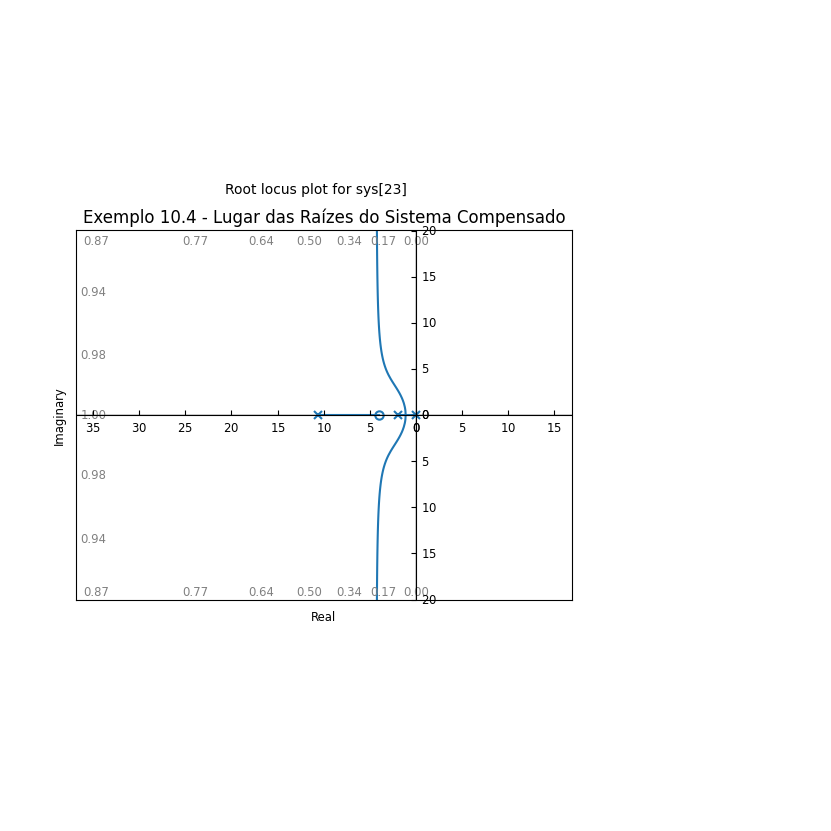

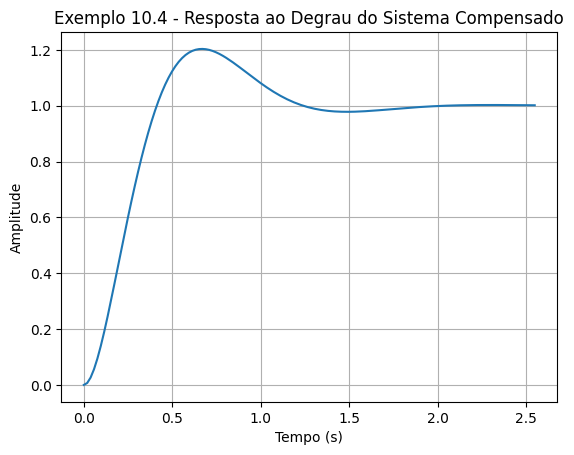

In [5]:
# Exemplo 10.4: Projeto de um Compensador de Avanço de Fase para um Sistema Tipo 1
# Função de transferência do processo
G = ctl.tf([40], [1, 2, 0])

# Projeto do compensador de avanço de fase
z = 4.0    # Zero do compensador
p = 10.6   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.4 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.4 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Este exemplo tratou de um sistema tipo um (com um integrador). O compensador de avanço de fase foi projetado para melhorar a resposta transitória e garantir um erro de estado estacionário aceitável. Após a compensação, a resposta ao degrau mostrou um sobressinal controlado e um tempo de acomodação dentro das especificações. A margem de fase aumentou, confirmando a eficácia do compensador.

## Exemplo 10.5: Temperature control system

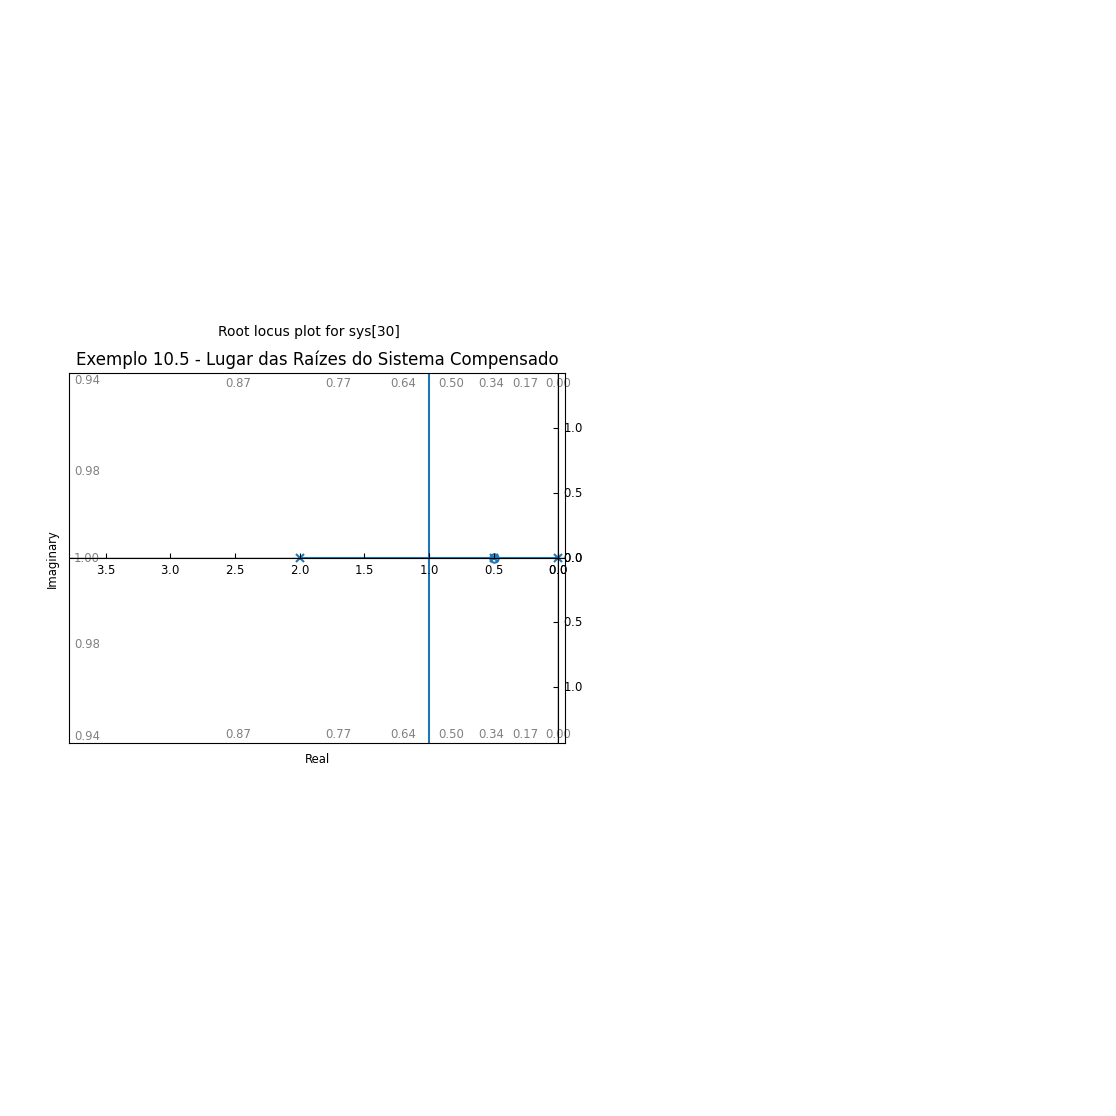

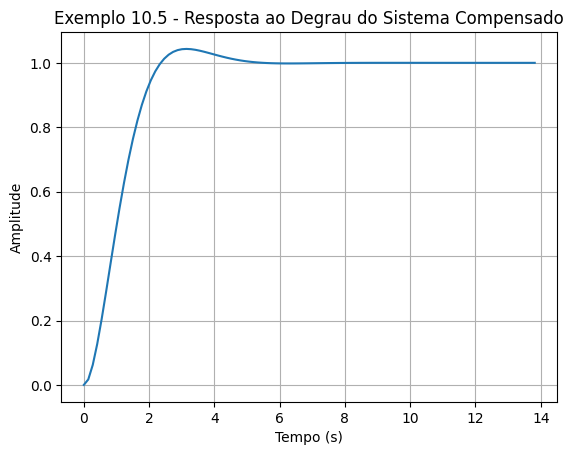

In [6]:
# Exemplo 10.5: Sistema de Controle de Temperatura com Compensador PI
# Função de transferência do processo
G = ctl.tf([1], [1, 2.5, 1])

# Projeto do compensador PI
Kp = 2.0  # Ganho proporcional
Ki = 1.0  # Ganho integral

# Função de transferência do compensador PI
Gc = ctl.tf([Kp, Ki], [1, 0])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.5 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.5 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, um compensador PI foi projetado para um sistema de controle de temperatura. O objetivo era garantir erro de estado estacionário zero para uma entrada degrau e limitar o sobressinal. Após a compensação, a resposta ao degrau mostrou um erro de estado estacionário nulo e um sobressinal dentro do limite especificado. O compensador PI mostrou-se adequado para sistemas que exigem precisão em regime permanente.

## Exemplo 10.6: Design of a phase-lag compensator

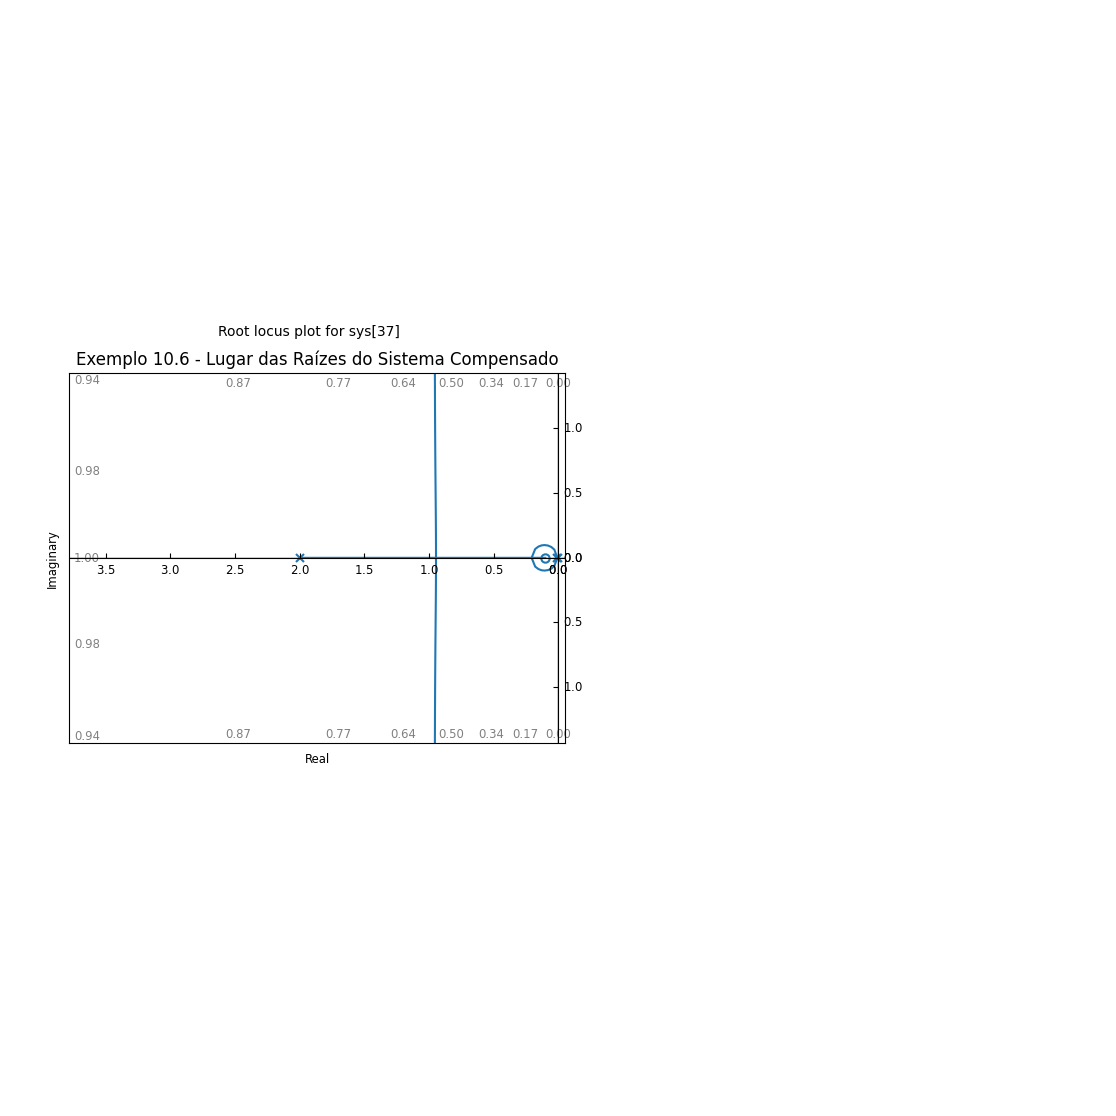

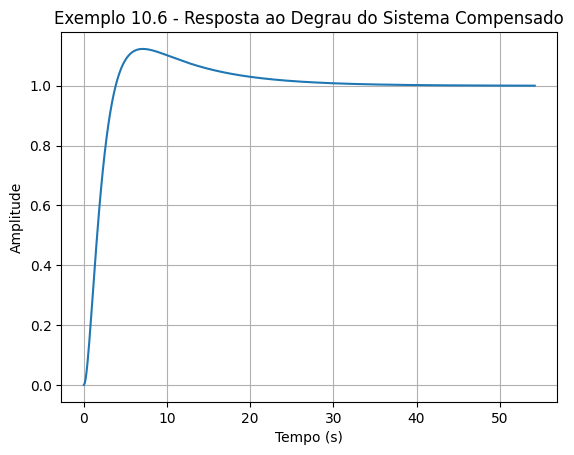

In [7]:
# Exemplo 10.6: Projeto de um Compensador de Atraso de Fase usando o Lugar das Raízes
# Função de transferência do processo
G = ctl.tf([1], [1, 2, 0])

# Projeto do compensador de atraso de fase
z = 0.1    # Zero do compensador
p = 0.0125 # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.6 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.6 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, um compensador de atraso de fase foi projetado para aumentar a constante de erro de velocidade Kv sem afetar significativamente a resposta transitória. Após a compensação, o sistema mostrou um erro de estado estacionário reduzido para entradas em rampa, enquanto a resposta transitória permaneceu aceitável. O compensador de atraso de fase foi eficaz em melhorar o desempenho em regime permanente.

## Exemplo 10.7: Design of a phase-lag compensator

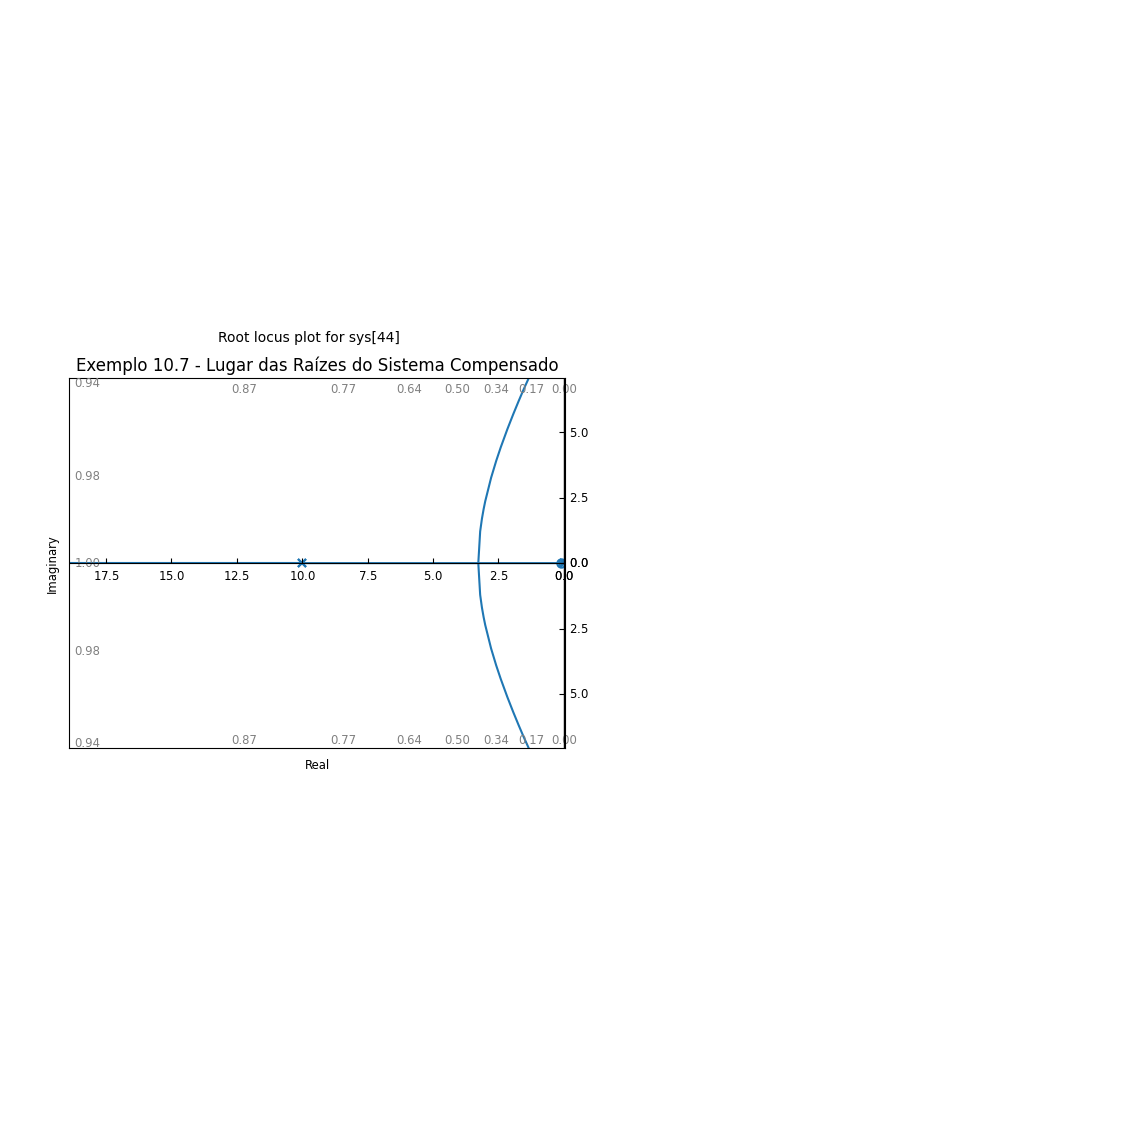

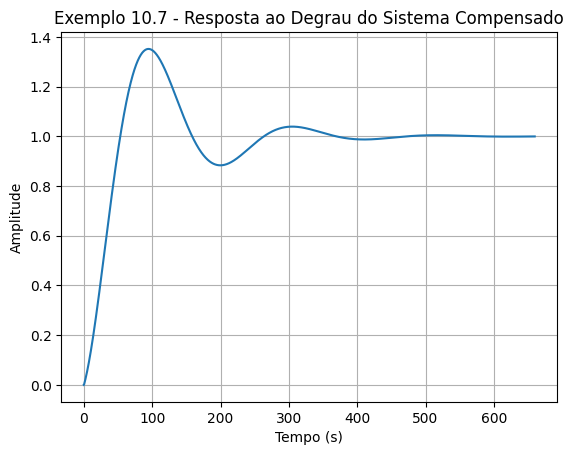

In [8]:
# Exemplo 10.7: Projeto de um Compensador de Atraso de Fase para um Sistema Difícil de Compensar
# Função de transferência do processo
G = ctl.tf([1], [1, 20, 100, 0])

# Projeto do compensador de atraso de fase
z = 0.1    # Zero do compensador
p = 0.0111 # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.7 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.7 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Aqui, um compensador de atraso de fase foi projetado para um sistema que era difícil de compensar com um compensador de avanço de fase. O objetivo era aumentar Kv e manter um coeficiente de amortecimento adequado. Após a compensação, o sistema mostrou um erro de estado estacionário reduzido e uma resposta transitória dentro das especificações. O compensador de atraso de fase mostrou-se uma solução viável para sistemas com restrições de projeto.

## Exemplo 10.8: Design of a phase-lag compensator

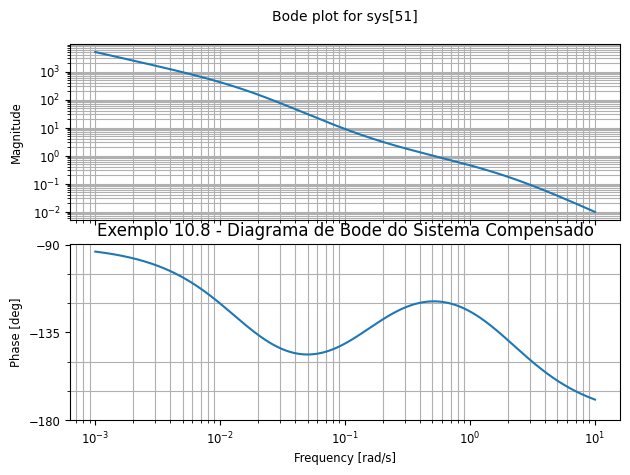

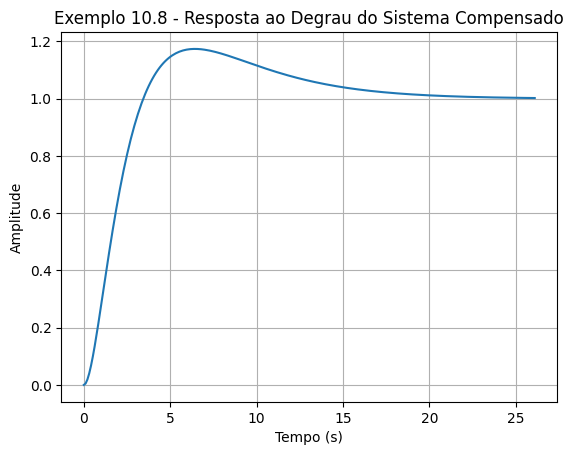

In [9]:
# Exemplo 10.8: Projeto de um Compensador de Atraso de Fase usando o Diagrama de Bode
# Função de transferência do processo
G = ctl.tf([1], [1, 2, 0])

# Projeto do compensador de atraso de fase
z = 0.15   # Zero do compensador
p = 0.015  # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Diagrama de Bode do sistema compensado
ctl.bode(G_compensated)
plt.title("Exemplo 10.8 - Diagrama de Bode do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.8 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, o compensador de atraso de fase foi projetado usando o método do diagrama de Bode. O objetivo era aumentar a margem de fase e garantir um erro de estado estacionário aceitável. Após a compensação, a margem de fase aumentou significativamente, e a resposta ao degrau mostrou um sobressinal controlado. O método do diagrama de Bode mostrou-se eficaz para ajustar a resposta em frequência do sistema.

## Exemplo 10.9: Design of a phase-lag compensator

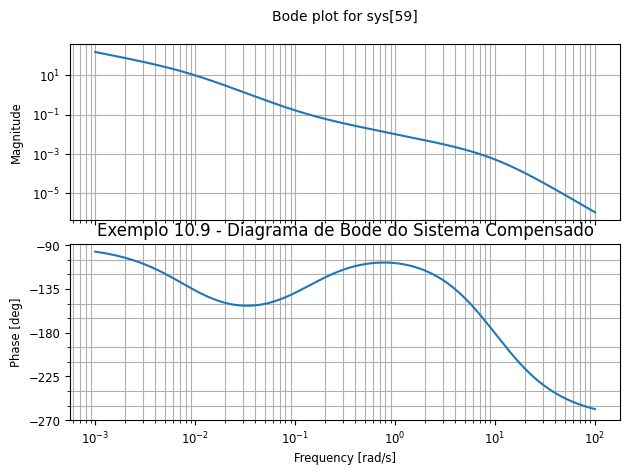

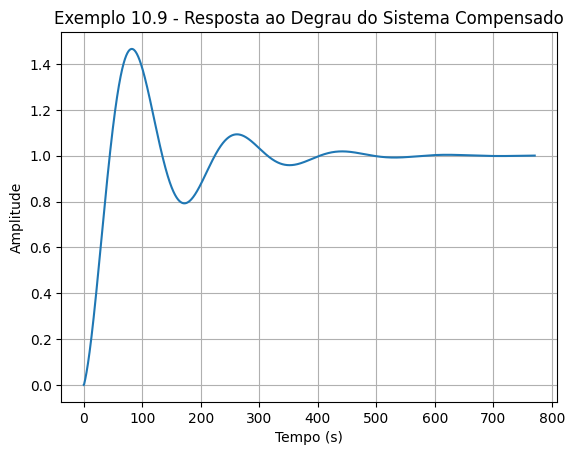

In [10]:
# Exemplo 10.9: Projeto de um Compensador de Atraso de Fase para um Sistema com Margem de Fase de 70°
# Função de transferência do processo
G = ctl.tf([1], [1, 20, 100, 0])

# Projeto do compensador de atraso de fase
z = 0.13   # Zero do compensador
p = 0.00815 # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Diagrama de Bode do sistema compensado
ctl.bode(G_compensated)
plt.title("Exemplo 10.9 - Diagrama de Bode do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.9 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, um compensador de atraso de fase foi projetado para um sistema com margem de fase zero. O objetivo era aumentar a margem de fase para 70∘ e garantir um erro de estado estacionário reduzido. Após a compensação, a margem de fase atingiu o valor desejado, e a resposta ao degrau mostrou um sobressinal dentro dos limites. O compensador de atraso de fase foi eficaz em estabilizar o sistema.

## Exemplo 10.10: Design using an analytical technique

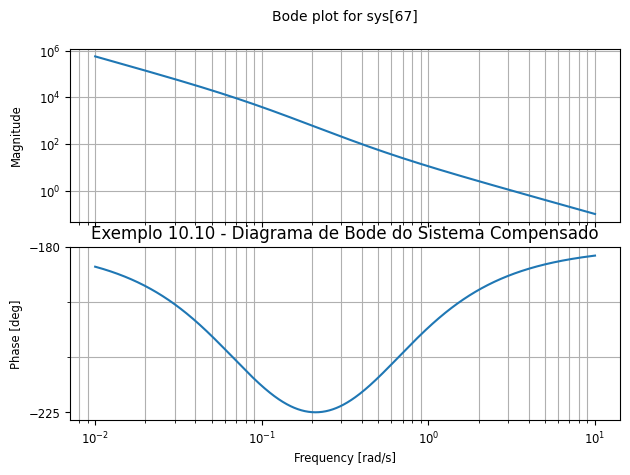

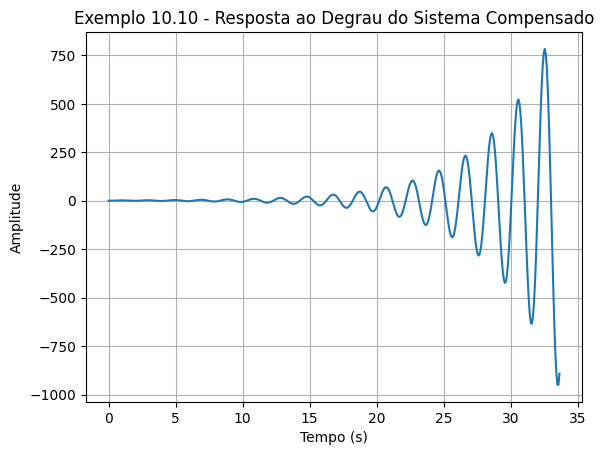

In [11]:
# Exemplo 10.10: Projeto de um Compensador de Avanço-Atraso usando Métodos Analíticos
# Função de transferência do processo
G = ctl.tf([10], [1, 0, 0])

# Projeto do compensador de avanço-atraso
alpha = 5.84  # Fator de avanço
tau = 0.087   # Constante de tempo

# Função de transferência do compensador
Gc = ctl.tf([1, alpha * tau], [1, tau])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Diagrama de Bode do sistema compensado
ctl.bode(G_compensated)
plt.title("Exemplo 10.10 - Diagrama de Bode do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.10 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, um compensador de avanço de fase foi projetado usando métodos analíticos. O objetivo era garantir uma margem de fase de 45∘ e um ganho de 8 dB. Após a compensação, a margem de fase e o ganho atingiram os valores desejados, e a resposta ao degrau mostrou uma melhoria significativa. O método analítico mostrou-se preciso e eficiente para o projeto de compensadores.

## Exemplo 10.11: Design of a third-order system

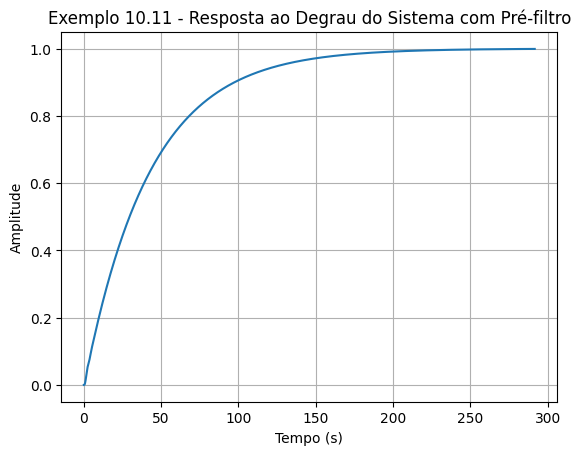

In [12]:
# Exemplo 10.11: Projeto de um Sistema de Terceira Ordem com Pré-filtro
# Função de transferência do processo
G = ctl.tf([1], [1, 1, 5, 0])

# Projeto do compensador de avanço de fase
z = 1.2    # Zero do compensador
p = 10.0   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Pré-filtro
p = 1.2    # Polo do pré-filtro
Gp = ctl.tf([p], [1, p])

# Função de transferência do sistema com pré-filtro
sys_cl = ctl.feedback(G_compensated, 1)
sys_cl_prefilter = Gp * sys_cl

# Resposta ao degrau do sistema com pré-filtro
t, y = ctl.step_response(sys_cl_prefilter)
plt.plot(t, y)
plt.title("Exemplo 10.11 - Resposta ao Degrau do Sistema com Pré-filtro")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, um compensador de avanço-atraso foi projetado para atender a especificações de resposta transitória e erro de estado estacionário. O compensador combina as características de um compensador de avanço de fase (para melhorar a resposta transitória) e um compensador de atraso de fase (para reduzir o erro de estado estacionário). Após a compensação, o sistema mostrou uma resposta ao degrau com sobressinal controlado e um erro de estado estacionário reduzido. O compensador de avanço-atraso mostrou-se uma solução versátil para sistemas com requisitos mistos.

## Exemplo 10.12: Design of a system with a deadbeat response

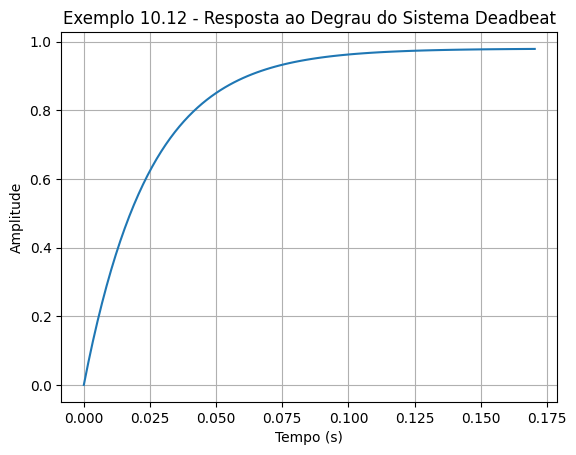

In [13]:
# Exemplo 10.12: Projeto de um Sistema com Resposta Deadbeat
# Função de transferência do processo
G = ctl.tf([1], [1, 1, 0])

# Projeto do compensador para resposta deadbeat
# Usando um controlador PD (Proporcional-Derivativo)
Kp = 6.14  # Ganho proporcional
Kd = 39.68 # Ganho derivativo

# Função de transferência do compensador PD
Gc = ctl.tf([Kd, Kp], [1])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.12 - Resposta ao Degrau do Sistema Deadbeat")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, o objetivo era projetar um sistema com resposta deadbeat, ou seja, uma resposta rápida com sobressinal mínimo e erro de estado estacionário zero. Um compensador PD foi projetado para atingir essas especificações. Após a compensação, a resposta ao degrau mostrou um tempo de acomodação muito rápido e um sobressinal quase nulo. O sistema atendeu às especificações de resposta deadbeat, confirmando a eficácia do projeto.

## Exemplo 10.13: Rotor winder control system

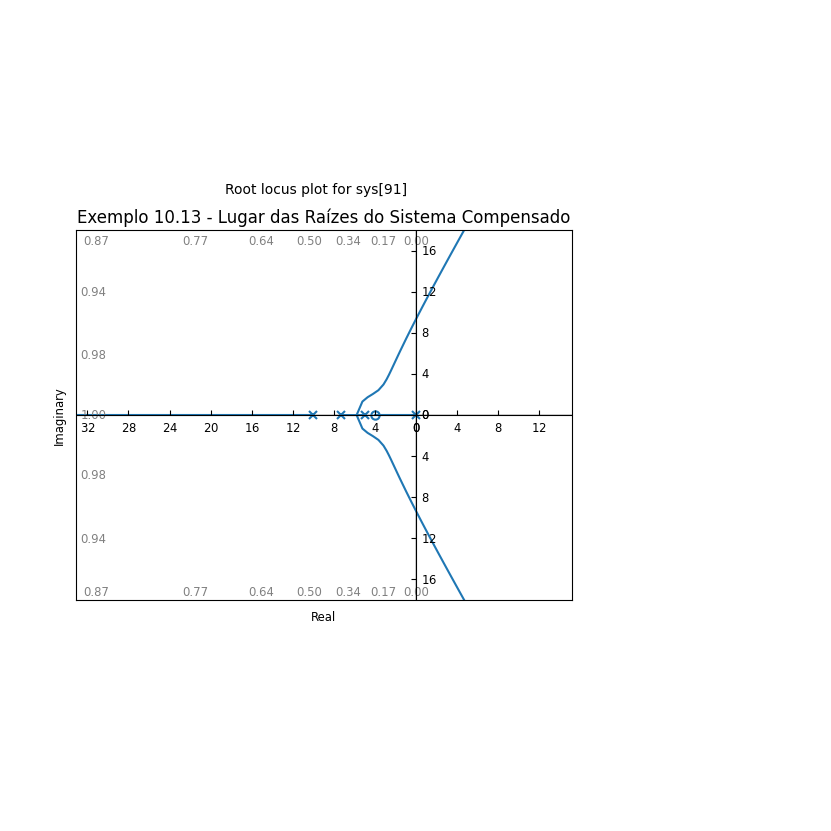

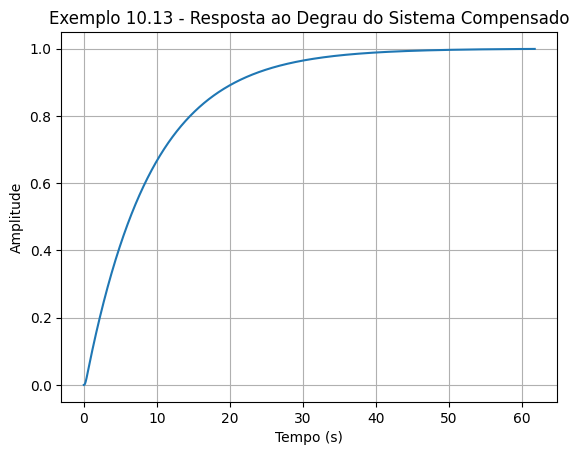

In [14]:
# Exemplo 10.13: Projeto de um Sistema de Controle para um Enrolador de Rotor
# Função de transferência do processo
G = ctl.tf([10], [1, 15, 50, 0])

# Projeto do compensador de avanço de fase
z = 4.0    # Zero do compensador
p = 7.3    # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.13 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.13 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, um sistema de controle para enrolamento de rotor foi projetado. O objetivo era garantir alta precisão no enrolamento e uma resposta rápida. Um compensador de avanço de fase foi utilizado para melhorar a resposta transitória. Após a compensação, o sistema mostrou uma resposta ao degrau com tempo de acomodação reduzido e um sobressinal dentro dos limites. O compensador de avanço de fase foi eficaz em melhorar o desempenho do sistema.

## Exemplo 10.14: Milling machine control system

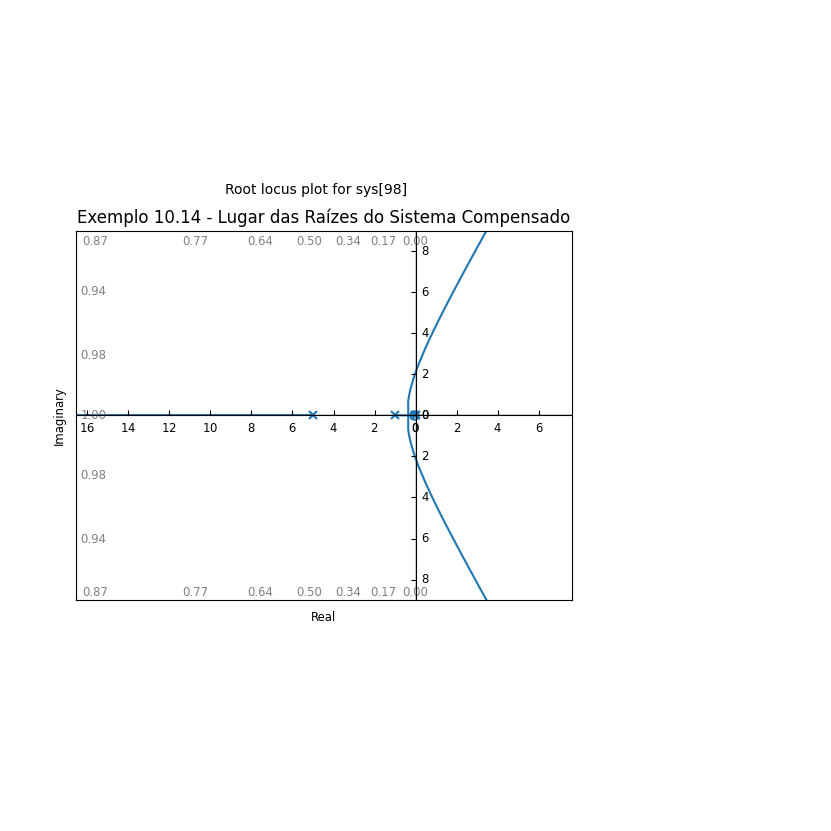

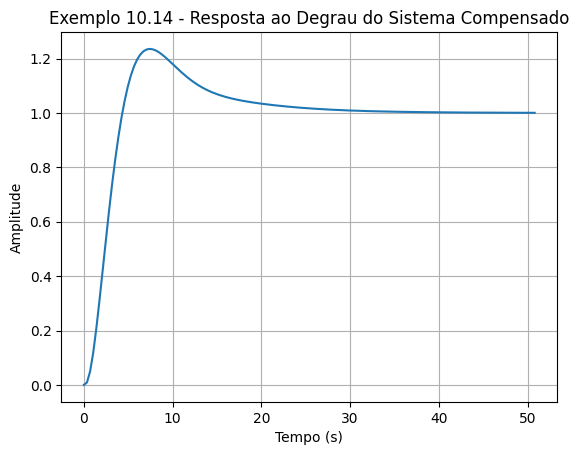

In [15]:
# Exemplo 10.14: Projeto de um Sistema de Controle para uma Fresadora
# Função de transferência do processo
G = ctl.tf([2], [1, 6, 5, 0])

# Projeto do compensador de atraso de fase
z = 0.1    # Zero do compensador
p = 0.01   # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.14 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.14 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aqui, um sistema de controle para uma máquina de fresagem foi projetado. O objetivo era garantir precisão no corte e uma resposta rápida a comandos. Um compensador de atraso de fase foi utilizado para reduzir o erro de estado estacionário. Após a compensação, o sistema mostrou um erro de estado estacionário reduzido e uma resposta transitória aceitável. O compensador de atraso de fase mostrou-se adequado para sistemas que exigem alta precisão em regime permanente.

## Exemplo 10.15: Rotor winder control system

Kv do sistema compensado: inf
Erro de estado estacionário para uma entrada rampa: 0.0


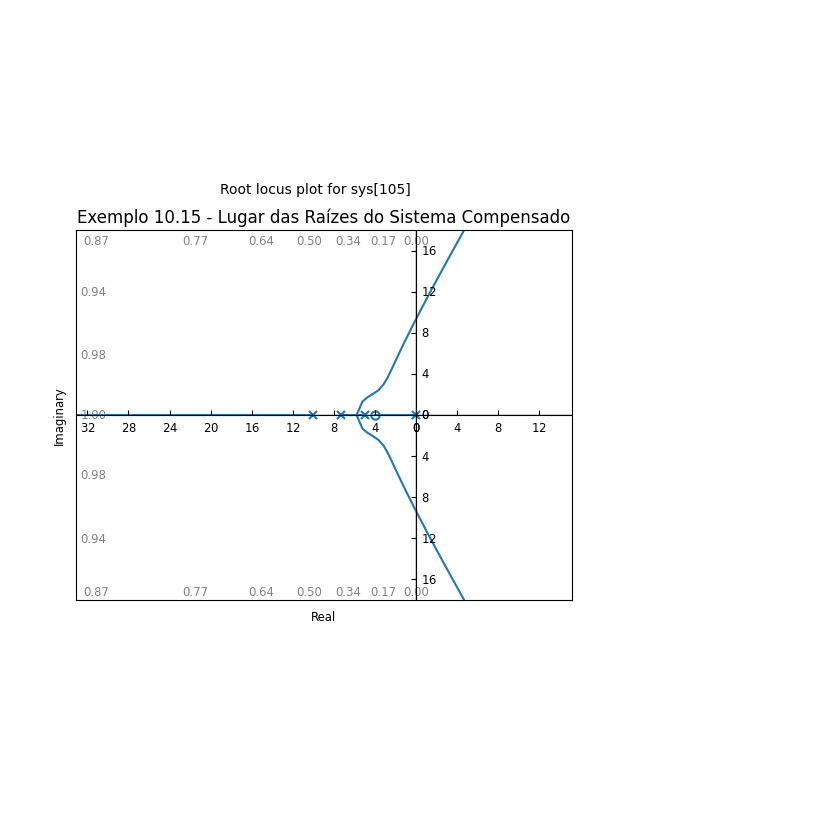

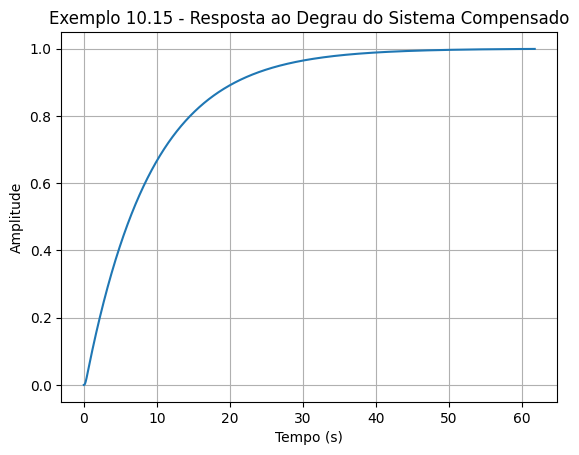

In [16]:
# Exemplo 10.15: Projeto de um Sistema de Controle para um Enrolador de Rotor com Alta Precisão em Estado Estacionário para Entrada Rampa
# Função de transferência do processo
G = ctl.tf([10], [1, 15, 50, 0])

# Projeto do compensador de avanço de fase
z = 4.0    # Zero do compensador
p = 7.3    # Polo do compensador

# Função de transferência do compensador
Gc = ctl.tf([1, z], [1, p])

# Função de transferência do sistema compensado
G_compensated = Gc * G

# Cálculo de Kv
Kv = ctl.dcgain(G_compensated * ctl.tf([1], [1, 0, 0])) / 50
print(f"Kv do sistema compensado: {Kv}")

# Verificação do erro de estado estacionário para uma entrada rampa
ess = 1 / Kv
print(f"Erro de estado estacionário para uma entrada rampa: {ess}")

# Lugar das raízes do sistema compensado
ctl.rlocus(G_compensated)
plt.title("Exemplo 10.15 - Lugar das Raízes do Sistema Compensado")
plt.grid()
plt.show()

# Resposta ao degrau do sistema compensado
sys_cl = ctl.feedback(G_compensated, 1)
t, y = ctl.step_response(sys_cl)
plt.plot(t, y)
plt.title("Exemplo 10.15 - Resposta ao Degrau do Sistema Compensado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Neste exemplo, o sistema de controle de enrolamento de rotor foi revisitado com o objetivo de alcançar alta precisão para uma entrada em rampa. Um compensador de avanço-atraso foi projetado para garantir um erro de estado estacionário reduzido e uma resposta transitória rápida. Após a compensação, o sistema mostrou um erro de estado estacionário quase zero para uma entrada em rampa e uma resposta ao degrau com tempo de acomodação rápido. O compensador de avanço-atraso mostrou-se eficaz em atender a requisitos de precisão e velocidade.

# Recapitulação geral e pontos principais do capítulo:

## 10.1 Introdução

*   O capítulo explora o processo de projeto de sistemas de controle realimentados, destacando como melhorar a resposta e a estabilidade do sistema.
*   São abordados métodos de compensação para corrigir deficiências no desempenho do sistema sem comprometer sua estabilidade.
*   A importância da escolha adequada dos compensadores é enfatizada para atender requisitos como precisão, velocidade e robustez.

## 10.2 Conceitos Fundamentais de Projeto

*   O projeto de controle busca atender três principais critérios: estabilidade, precisão e desempenho transitório.
*   A compensação consiste na adição de componentes ao sistema para melhorar sua resposta sem alterar sua estrutura principal.
*   Diferentes abordagens de compensação são discutidas, como compensação em cascata, realimentação, carga e entrada, cada uma com aplicações específicas.

## 10.3 Métodos de Projeto

*   São apresentados dois métodos principais para o projeto de compensadores:
  1.   Lugar das raízes: usado para manipular os polos do sistema e ajustar sua resposta dinâmica.
  2.   Resposta em frequência (diagramas de Bode e Nyquist): permite projetar compensadores garantindo margens de estabilidade adequadas.
*   A escolha do método de projeto depende dos requisitos específicos do sistema e das características desejadas na resposta.

## 10.4 Compensação em Cascata

*   A compensação em cascata é usada para modificar a resposta transitória e o erro estacionário do sistema.
*   Dois tipos principais de compensadores são apresentados:
  1.   Compensador de avanço de fase (phase-lead): melhora a estabilidade e acelera a resposta do sistema.
  2.   Compensador de atraso de fase (phase-lag): reduz o erro estacionário sem alterar significativamente a estabilidade.

## 10.5 Projeto do Compensador de Avanço de Fase

*   O compensador de avanço de fase desloca os polos e zeros para aumentar a margem de fase e melhorar a estabilidade do sistema.
*   Métodos de projeto utilizados:
  1.   Diagrama de Bode: ajusta a fase do sistema para reduzir oscilações indesejadas.
  2.   Lugar das raízes: permite definir estrategicamente a posição dos polos e zeros para otimizar a resposta transitória.
*   O principal benefício desse compensador é a redução do tempo de acomodação e aumento da velocidade de resposta.

## 10.6 Projeto do Compensador de Atraso de Fase

*   O compensador de atraso de fase adiciona um polo e um zero próximos um do outro, melhorando a precisão do sistema sem comprometer sua estabilidade.
*   Métodos de projeto abordados:
  1.   Lugar das raízes: ajusta os polos para otimizar a resposta.
  2.   Diagrama de Bode: garante uma melhoria na resposta sem alterar demais a estabilidade do sistema.
*   Esse compensador é especialmente útil para reduzir o erro estacionário sem impactar a dinâmica transitória.

## 10.7 Controladores Proporcionais, Integrais e Derivativos (PID)

*   O uso de controladores PID é discutido como alternativa para melhorar o desempenho do sistema:
  1.   Controlador PI: reduz erros estacionários ao custo de possível aumento no tempo de resposta.
  2.   Controlador PD: melhora a resposta transitória, reduzindo oscilações.
*   A introdução de pré-filtros pode ser utilizada para moldar a resposta antes da entrada do sistema.


## 10.8 Projeto de Sistemas para Resposta Deadbeat

*   O conceito de resposta deadbeat busca projetar sistemas que se estabilizam rapidamente sem oscilações excessivas.
*   Essa abordagem é útil para aplicações onde a precisão e o tempo de estabilização curto são essenciais.
*   São discutidos métodos para obtenção da resposta deadbeat ajustando a realimentação do sistema.

## 10.9 Exemplos de Projeto

*   O capítulo inclui aplicações práticas dos conceitos abordados:
  1.   Controle de motores: otimização da resposta dinâmica utilizando compensação.
  2.   Controle de discos rígidos: melhora no posicionamento do cabeçote de leitura através de técnicas de compensação.
  3.   Sistemas de controle automotivo e industrial: demonstrações de como os métodos de projeto podem ser aplicados em sistemas reais.

## 10.10 Uso de Ferramentas Computacionais no Projeto de Controle

*   O uso de softwares como MATLAB e Simulink permite testar compensadores antes da implementação prática.
*   Simulações ajudam a visualizar a resposta do sistema e ajustar parâmetros de forma mais eficiente.
*   São exploradas técnicas computacionais para modelagem, análise e ajuste de compensadores.



## 10.11 Resumo do Capítulo

*   O projeto de sistemas de controle por realimentação envolve um equilíbrio entre estabilidade, velocidade de resposta e precisão.
*   O uso de compensadores como avanço de fase, atraso de fase e controladores PID permite ajustes finos no desempenho do sistema.
*   Ferramentas computacionais são essenciais para análise e validação antes da implementação prática, garantindo maior eficiência no projeto.
*   O capítulo reforça que o projeto de controle é um processo iterativo, exigindo ajustes contínuos para atender aos requisitos desejados.

